In [1]:
#### conda env Weather_Prediction

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import os
import seaborn as sns
import geopandas as gpd
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', None)

In [2]:
PATH_1=os.path.join('..','..','Weather_prediction','Results','final_dataset_103_features.pkl')
df1=pd.read_pickle(PATH_1)
## remove total column, AOD and vertically integrated except total column ozone
df2 = df1.drop(['Total column carbon monoxide','Black carbon AOD at 550 nm',
                        'Dust AOD at 550 nm', 'Organic matter AOD at 550 nm', 'Sea salt AOD at 550 nm','Sulphate AOD at 550 nm',
                        'Total AOD at 469 nm','Total AOD at 550 nm','Total AOD at 670 nm','Total AOD at 865 nm',
                        'Total AOD at 1240 nm',
                        'Total column water',
                        'Land-sea mask',
                        'Total column ethane','Total column formaldehyde',
                        'Total column hydrogen peroxide','Total column hydroxyl radical','Total column isoprene',
                        'Total column methane','Total column nitric acid','Total column nitrogen dioxide','Total column nitrogen monoxide',
                         'Total column peroxyacetyl nitrate','Total column propane','Total column sulphur dioxide','Total column water vapour',
                        'Vertically integrated mass of dust aerosol (0.03-0.55 \u00B5m)',
                        'Vertically integrated mass of dust aerosol (0.55-9 \u00B5m)',
                        'Vertically integrated mass of dust aerosol (9-20 \u00B5m)',
                        'Vertically integrated mass of hydrophilic black carbon aerosol',
                       'Vertically integrated mass of hydrophilic organic matter aerosol',
                       'Vertically integrated mass of hydrophobic black carbon aerosol',
                       'Vertically integrated mass of hydrophobic organic matter aerosol',
                       'Vertically integrated mass of sea salt aerosol (0.03-0.5 \u00B5m)',
                       'Vertically integrated mass of sea salt aerosol (0.5-5 \u00B5m)',
                       'Vertically integrated mass of sea salt aerosol (5-20 \u00B5m)',
                       'Vertically integrated mass of sulphate aerosol',
                       'Vertically integrated mass of sulphur dioxide'], axis=1)
df2

,fips,year,MeanLifeExpectency,2m dew point temperature,2m temperature,Mean sea level pressure,PM$_1$,PM$_{2.5}$,PM$_{10}$,Surface geopotential,Surface pressure,Total column ozone,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Relative humidity,Specific humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above75ᵗʰ percentile,FoT Ethane above75ᵗʰ percentile,FoT Formaldehyde above75ᵗʰ percentile,FoT Hydroxyl radical above75ᵗʰ percentile,FoT Isoprene above75ᵗʰ percentile,FoT Peroxyacetyl Nitrate above75ᵗʰ percentile,FoT Nitric acid above75ᵗʰ percentile,FoT Nitrogen dioxide above75ᵗʰ percentile,FoT Nitrogen monoxide above75ᵗʰ percentile,FoT Ozone above75ᵗʰ percentile,FoT Hydrogen peroxide above75ᵗʰ percentile,FoT PM$_{10}$ above75ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT PM$_{1}$ above75ᵗʰ percentile,FoT PM$_{2.5}$ above75ᵗʰ percentile,FoT Propane above75ᵗʰ percentile,FoT Sulphur dioxide above75ᵗʰ percentile,FoT Temperature above75ᵗʰ percentile,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below25ᵗʰ percentile,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,1001,2003,74.628765329999993,285.629269414872169,290.863352214209158,101746.46078524258337,0.000000015615338,0.000000019601377,0.000000027192044,1368.670051439976305,100086.817007783130975,0.006426156201957,0.000000230284119,0.000000000654884,0.000000001134462,0.000000000403961,0.000000000705993,0.000000003513651,0.000000000741261,0.00000000022451,0.000000010096395,0.000000000254529,0.000000005847693,0.000000000000028,0.000000014604292,0.000000001474772,0.000000010235872,0.000000000867748,0.00000005814554,0.000000003056157,0.000000000328437,0.000000000023239,0.000000001862196,0.000000000212949,0.010010040534155,0.00000000404404,0.000000009229008,17.605204629052423,3.904460199286052,2.618741604547198,0.879750469058084,0.000000093784908,71.152047054515833,0.010074853188795,0.209342152896552,14.185547266162992,28.458904109589039,30.958904109589042,52.910958904109584,25.684931506849317,38.732876712328768,47.465753424657535,26.027397260273972,22.876712328767123,8.390410958904109,48.938356164383563,32.705479452054789,40.445205479452056,0.034246575342466,38.356164383561641,40.719178082191782,19.315068493150687,38.150684931506852,62.191780821917810,0.000000000000000,18.801369863013697,1.643835616438356,78.219178082191775
1,1003,2003,76.661419230000007,289.075082204243699,292.904504754344714,101714.38567138351209,0.000000010517524,0.000000014405518,0.000000020184934,170.454787516937728,101507.029992429539561,0.006262634883947,0.000000181097315,0.000000000693319,0.000000001175466,0.000000000446316,0.000000000603835,0.000000001813065,0.000000000839633,0.000000000174842,0.000000006299133,0.00000000017639,0.000000003192137,0.000000000000043,0.000000003807398,0.000000001664988,0.000000006039749,0.000000000390859,0.000000063545074,0.000000001913777,0.000000000255961,0.000000000080547,0.000000006659332,0.000000004087758,0.012053964031284,0.000000003376943,0.000000004951391,19.898584096705463,2.493748263318578,1.556460793604144,0.87998489125148,0.0,74.39917284407359,0.011615945151359,0.42506917399947,16.735605496466448,10.034246575342467,17.979452054794521,27.910958904109588,31.232876712328768,14.280821917808220,26.609589041095887,32

In [3]:
## load state shapefile

SHAPE_PATH = os.path.join('..','..','Weather_prediction','Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)
## include only CONUS shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape.head()

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


Fitting 4 folds for each of 16 candidates, totalling 64 fits


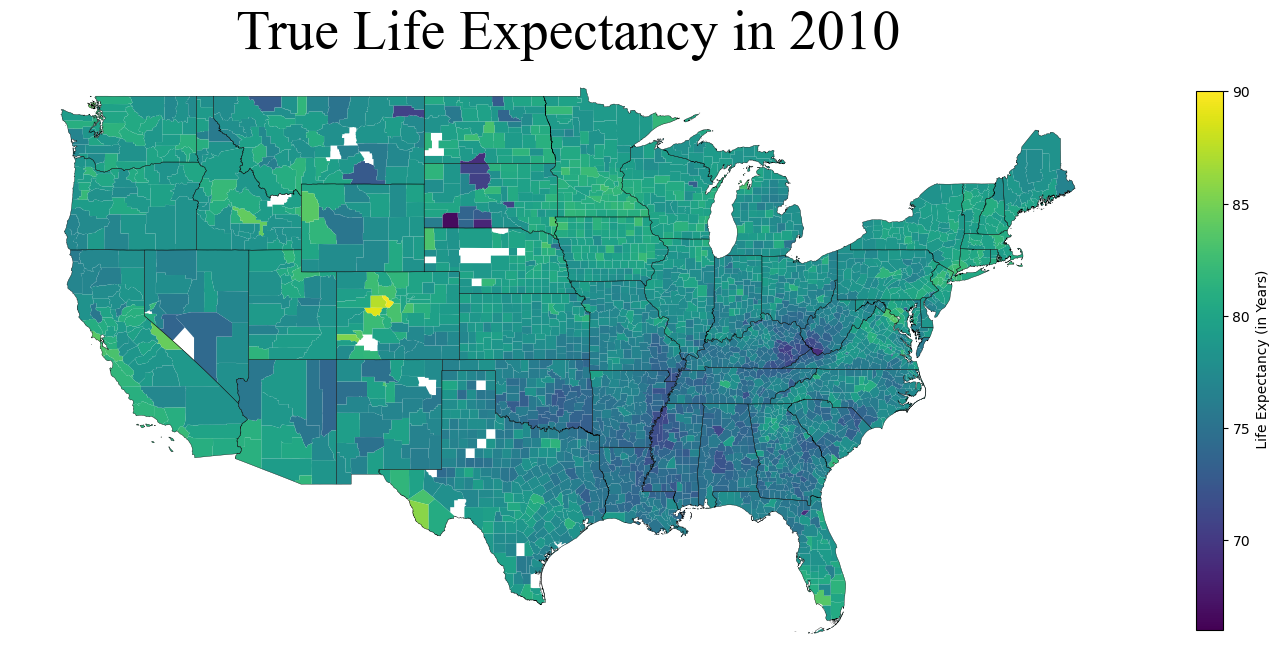

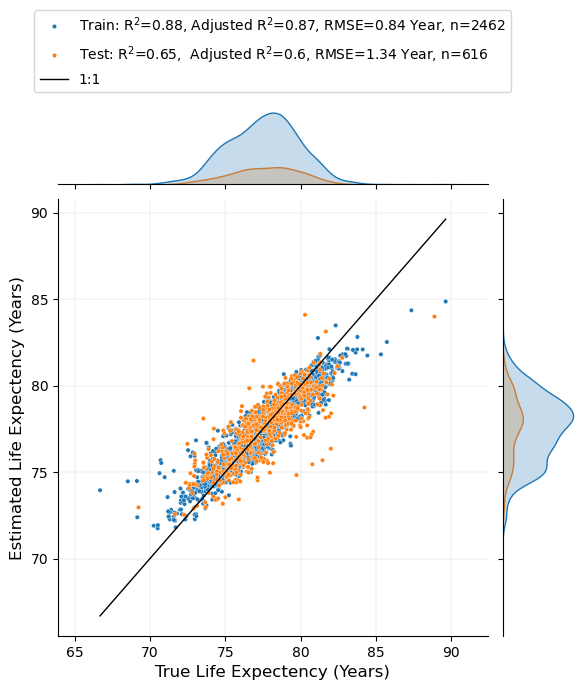

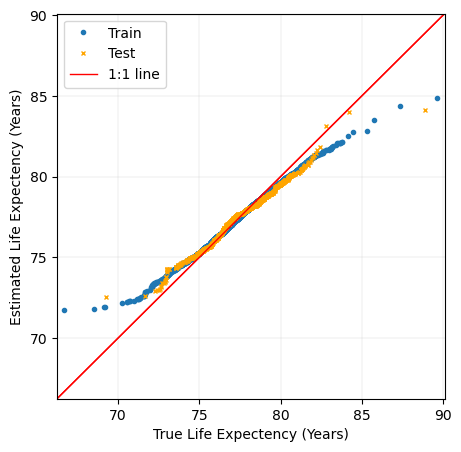

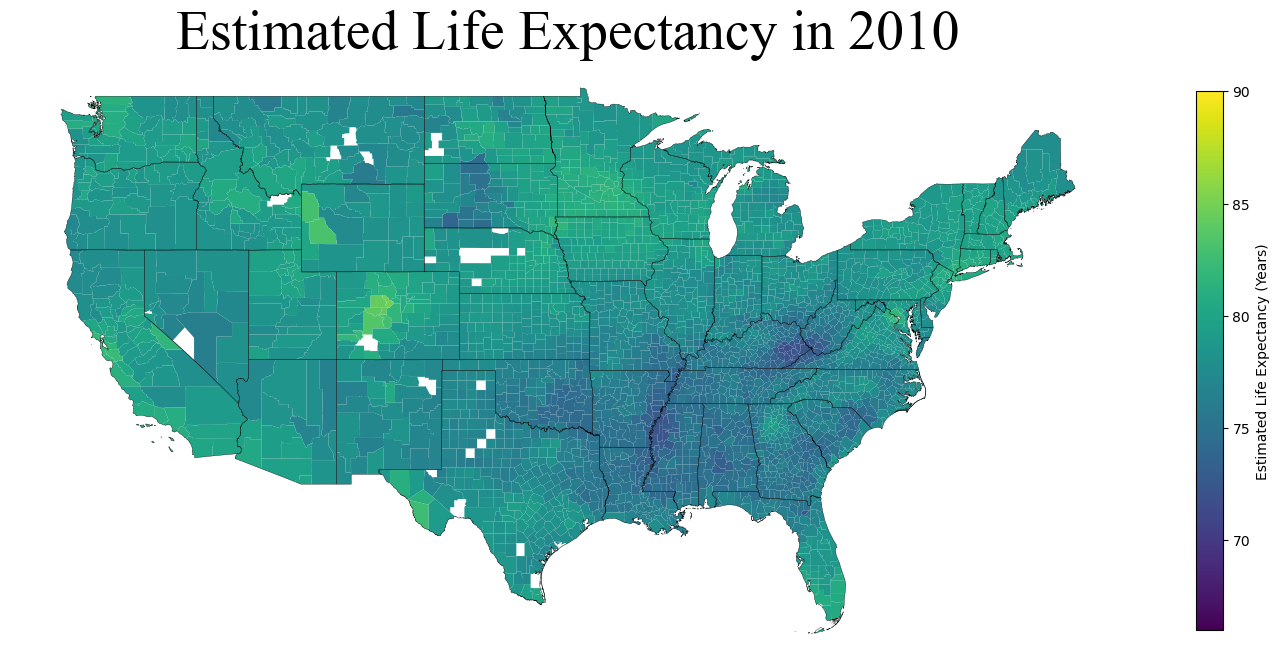

In [4]:
i=2010 ## enter the year 2010, 2015 or 2019
full_df=df2.loc[(df2['year'] == i)] ## extract this year data only

## get the shapefile

if i==2010:
        
    SHAPE_PATH=os.path.join('..','..','Weather_prediction','Shapefiles','county_shapefiles','2010_county_shapefile',
                        'gz_2010_us_050_00_500k.shp')
    county_gdf = gpd.read_file(SHAPE_PATH)
    county_gdf['fips']=county_gdf['STATE'] + county_gdf['COUNTY']
    county_gdf.dtypes
    ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)

elif i==2015:
        
    SHAPE_PATH=os.path.join('..','..','Weather_prediction','Shapefiles','county_shapefiles','2015_county_shapefile',
                        'cb_2015_us_county_500k.shp')
    county_gdf = gpd.read_file(SHAPE_PATH)
    county_gdf['fips']=county_gdf['STATEFP'] + county_gdf['COUNTYFP']
    county_gdf.dtypes
        ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)     

elif i==2019:

    SHAPE_PATH=os.path.join('..','..','Weather_prediction','Shapefiles','county_shapefiles','2019_county_shapefile',
                        'cb_2019_us_county_500k.shp')
    county_gdf = gpd.read_file(SHAPE_PATH)
    county_gdf['fips']=county_gdf['STATEFP'] + county_gdf['COUNTYFP']
    county_gdf.dtypes
        ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)

else:
    print('no year exist')
    
gpd_df = pd.merge(county_gdf, full_df, on='fips', how='left') ## merge dataframes to plot
gpd_df= gpd_df.dropna()
gpd_df        
        
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
gpd_df.plot(ax=ax,column='MeanLifeExpectency', legend=True, legend_kwds={"label": " Life Expectancy (in Years)", 
                                                                               "shrink":0.50}, vmin=66, vmax=90)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('True Life Expectancy in '+str(i), **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})
PATH_2=os.path.join('..','Figures','True_'+str(i))
plt.savefig(PATH_2)

## Lets create a Train-Test set

features=full_df.drop(['MeanLifeExpectency','year','fips'],axis=1)
target=full_df['MeanLifeExpectency'].copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) 

## initial results

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train, y_train)

train_prediction=forest_reg.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

## lets optimize the hyperparameters
forest_reg=RandomForestRegressor(n_jobs=-1, oob_score=True) ## also include oob score. this can be removed if not necessary

hyper_parameters=[{'n_estimators':[200, 250],'max_features': [10,20], 'max_depth':[150, 200],
                                                              'min_samples_split':[ 10,20]}]
grid_search=GridSearchCV(forest_reg,hyper_parameters,cv=4,scoring="neg_mean_squared_error",return_train_score=True, verbose=1)
grid_search.fit(X_train,y_train)

## lets now select the model. This will be used later
final_model=grid_search.best_estimator_

## fit the model and find the error in the traning set

final_model.fit(X_train,y_train)

train_prediction=final_model.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

## The test prediction

test_prediction=final_model.predict(X_test)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 


## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

## calculate the adjusted r square

## in training set

n_train=X_train.shape[0] ## number of samples in training set
n_test=X_test.shape[0]  ## number of samples in test set
p=X_train.shape[1] ## number of features, which is the same in train and test set

train_adjusted_r2=1-(1-corr_train)*((n_train-1)/(n_train-p-1))
train_adjusted_r2=int(train_adjusted_r2*100)/100 ## display only two digits without rounding

test_adjusted_r2=1-(1-corr_test)*((n_test-1)/(n_test-p-1))
test_adjusted_r2=int(test_adjusted_r2*100)/100 ## display only two digits without rounding


## steps to convert train and test to pandas dataframe. This step is necessary to plot in seaborn

y_train_np=y_train.to_numpy() ## convert dtype to numpy to plot from seaborn
y_test_np=y_test.to_numpy() 

df1=pd.DataFrame(y_train_np, columns=['Actual'])
df2=pd.DataFrame(train_prediction, columns=['Estimated'])
df3=pd.concat([df1, df2],axis=1)  ## concatenate the columns
df3['Label']='Train'

df4=pd.DataFrame(y_test_np, columns=['Actual'])
df5=pd.DataFrame(test_prediction, columns=['Estimated'])
df6=pd.concat([df4, df5],axis=1)
df6['Label']='Test'

sns_df=pd.concat([df3,df6])
## scatter plot in seaborn

g=sns.jointplot(data=sns_df, x='Actual', y='Estimated', kind="scatter", hue='Label',s=10)
plt.grid(axis='both',linewidth=0.15)

p1 = max(max(train_prediction), max(y_train))
p2 = min(min(train_prediction), min(y_train))

g.ax_joint.plot([p1, p2], [p1, p2], color='k',linewidth=1, label='1:1')

# Customize the legend
handles, labels = g.ax_joint.get_legend_handles_labels()  

g.ax_joint.legend(handles=handles,  
    labels=[ f'Train: R$^2$={corr_train}, Adjusted R$^2$={train_adjusted_r2}, RMSE={rmse_train} Year, n={len(X_train)}', 
        f'Test: R$^2$={corr_test},  Adjusted R$^2$={test_adjusted_r2}, RMSE={rmse_test} Year, n={len(X_test)}','1:1'],
                        title=None)

sns.move_legend(g.ax_joint, "upper center", bbox_to_anchor=(0.5, 1.45))

g.set_axis_labels(r'True Life Expectency (Years)', r'Estimated Life Expectency (Years)',fontsize=12)

PATH_2=os.path.join('..','Figures','scatter_'+str(i))
plt.savefig(PATH_2)


## Lets plot the quantile-quantile plot

fig, ax = plt.subplots(figsize=(5,5))

pp_x = sm.ProbPlot(y_train, fit=False)
pp_y = sm.ProbPlot(train_prediction, fit=False)


qq = pp_y.qqplot(marker='o',markersize=3,other=pp_x,ax=ax, label='Train') ## qq plot for train data
sm.qqline(ax=ax, line='45', fmt='r',linewidth=1)

pp_xx = sm.ProbPlot(y_test, fit=False)
pp_yy = sm.ProbPlot(test_prediction, fit=False)

## overlay qq plot for test data
qqq = pp_yy.qqplot(xlabel='True Life Expectency (Years)',ylabel='Estimated Life Expectency (Years)',
                            marker='x',markersize=3,other=pp_xx,ax=ax,markeredgecolor = 'orange',
                                      markerfacecolor = 'orange', label='Test')

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1, label='1:1 line')
plt.grid(axis='both',linewidth=0.15)
plt.legend()
PATH_2=os.path.join('..','Figures','qq_'+str(i))
plt.savefig(PATH_2)


## plot estimated values
y_train_df=pd.DataFrame([y_train]).T
y_train_df['Train Prediction']=train_prediction

y_test_df=pd.DataFrame([y_test]).T
y_test_df['Test Prediction']=test_prediction

y_train_df=y_train_df.drop('MeanLifeExpectency', axis=1)
y_test_df=y_test_df.drop('MeanLifeExpectency', axis=1)

df_train = pd.merge(full_df, ## merge index with original data
                    y_train_df, left_index=True, right_index=True, how='left') 
df_train.head()
df_train = df_train[['fips', 'Train Prediction']] ## get only fips and train prediction
df_train=df_train.dropna()

df_test = pd.merge(full_df, ## merge index with original data
                    y_test_df, left_index=True, right_index=True, how='left') 
df_test.head()
df_test = df_test[['fips', 'Test Prediction']] ## get only fips and test prediction
df_test=df_test.dropna()

plot_train = pd.merge(county_gdf, df_train, on='fips', how='left') 
plot_train= plot_train.dropna()

plot_test = pd.merge(county_gdf, df_test, on='fips', how='left') 
plot_test= plot_test.dropna()

plot_train=plot_train.rename(columns={"Train Prediction": "Estimated"})
plot_test=plot_test.rename(columns={"Test Prediction": "Estimated"})

final_df=pd.concat([plot_train, plot_test])
final_df = final_df[['fips', 'Estimated']]

combined_plot = pd.merge(county_gdf, final_df, on='fips', how='left') 
combined_plot=combined_plot.dropna()

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 


## plot the county shape file
combined_plot.plot(ax=ax,column='Estimated', legend=True, legend_kwds={"label": "Estimated Life Expectancy (Years)", 
                                                                                   "shrink":0.50}, vmin=66, vmax=90)
hfont = {'fontname':'Times New Roman'}

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
ax.set_title('Estimated Life Expectancy in '+ str(i), **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

PATH_2=os.path.join('..','Figures','Estimated_'+str(i))
plt.savefig(PATH_2)


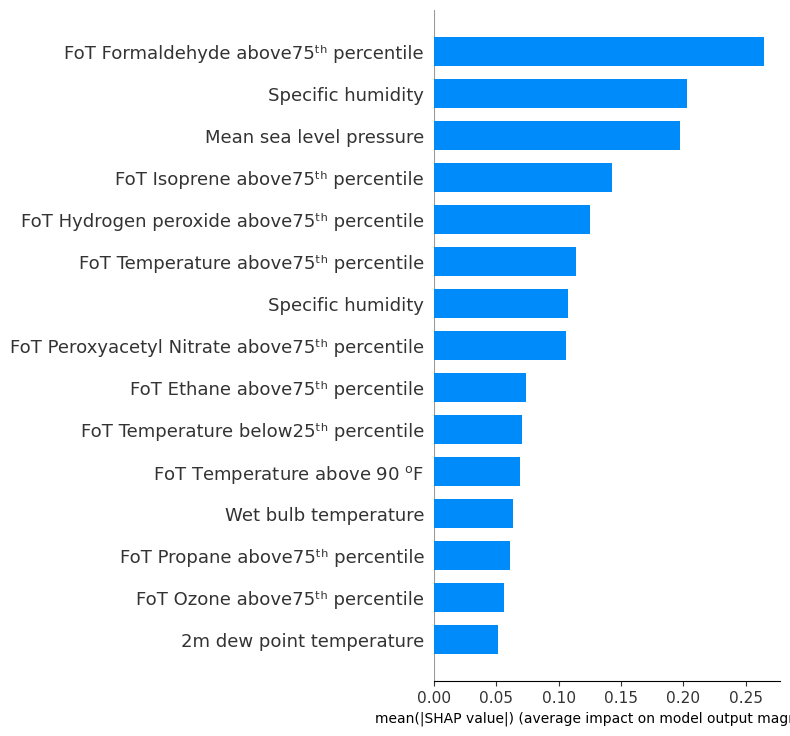

In [5]:
## displaying the feature importance using shap values

shap_values = shap.TreeExplainer(final_model).shap_values(X_train)

## these changes were necessary as the xlabel went beyond the figure, so fontsize needs to be adjusted

shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=15, show=False)
fig, ax1 = plt.gcf(), plt.gca()
ax1.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=10)

PATH_2=os.path.join('..','Figures','shap_'+str(i))
plt.savefig(PATH_2)